In [22]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# read the dataset
df = pd.read_csv ('cars_clean.csv')

In [24]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [25]:
df.shape

(201, 27)

In [26]:
df.info

<bound method DataFrame.info of      Unnamed: 0  symboling  normalized-losses         make fuel-type  \
0             0          3                122  alfa-romero       gas   
1             1          3                122  alfa-romero       gas   
2             2          1                122  alfa-romero       gas   
3             3          2                164         audi       gas   
4             4          2                164         audi       gas   
..          ...        ...                ...          ...       ...   
196         196         -1                 95        volvo       gas   
197         197         -1                 95        volvo       gas   
198         198         -1                 95        volvo       gas   
199         199         -1                 95        volvo    diesel   
200         200         -1                 95        volvo       gas   

    aspiration num-of-doors   body-style drive-wheels engine-location  ...  \
0          std          t

In [27]:
df.tail()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
196,196,-1,95,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,198,-1,95,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470
200,200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625


In [28]:
#do a cross-correlation check
df.corr(numeric_only = True)

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
Unnamed: 0,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244734,-0.162490,0.144301,-0.022474,-0.195662,0.027956,0.020344,-0.118214
symboling,-0.162764,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391
normalized-losses,-0.241092,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999
wheel-base,0.125517,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642
length,0.161848,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628
width,0.043976,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265
height,0.252015,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486
curb-weight,0.064820,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415
engine-size,-0.047764,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335
bore,0.244734,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155


In [29]:
#parameters that are closely related with price
#find correlation of a subset of parameters
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr(numeric_only = True)

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187871,0.098267
compression-ratio,0.001263,0.187871,1.000000,-0.214514
horsepower,0.566936,0.098267,-0.214514,1.000000


(0.0, 53348.228642806986)

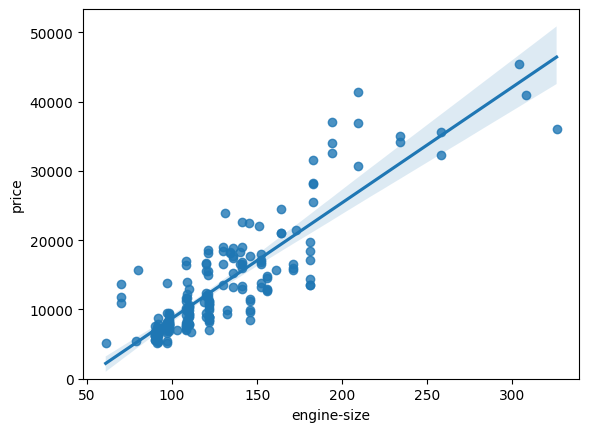

In [30]:
# Relationship Among Data
#Check relationship between engine-size and price

sns.regplot (x = 'engine-size', y = 'price', data = df)
plt.ylim(0,)

In [31]:
df[['engine-size', 'price']].corr(numeric_only = True)

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


In [32]:
df[['highway-mpg', 'price']].corr(numeric_only = True)

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


(0.0, 48166.8309219989)

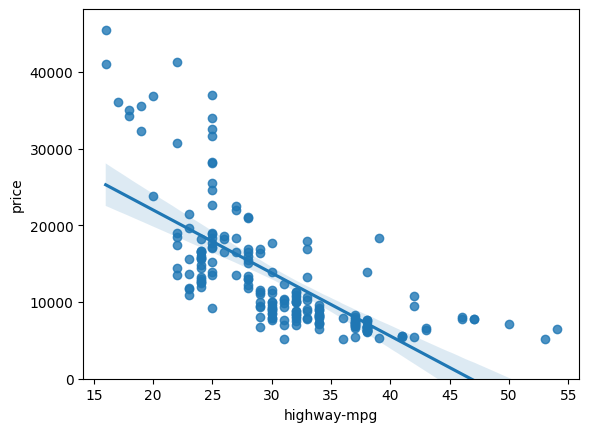

In [33]:
sns.regplot (x = 'highway-mpg', y = 'price', data = df)
plt.ylim(0,)

(0.0, 47414.1)

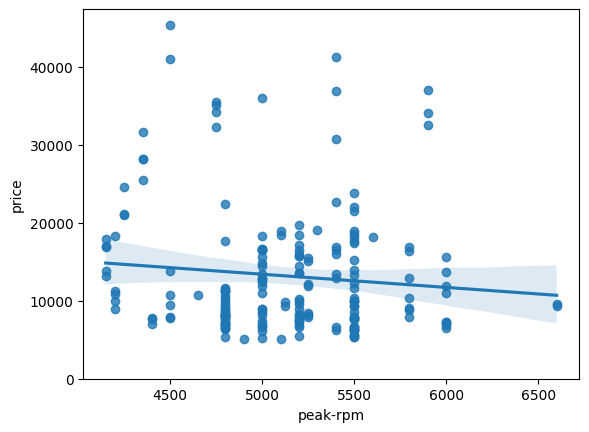

In [34]:
sns.regplot (x = 'peak-rpm', y = 'price', data = df)
plt.ylim(0,)

In [35]:
df[['peak-rpm', 'price']].corr(numeric_only = True)

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [36]:
# Catergorical Variables

<Axes: xlabel='body-style', ylabel='price'>

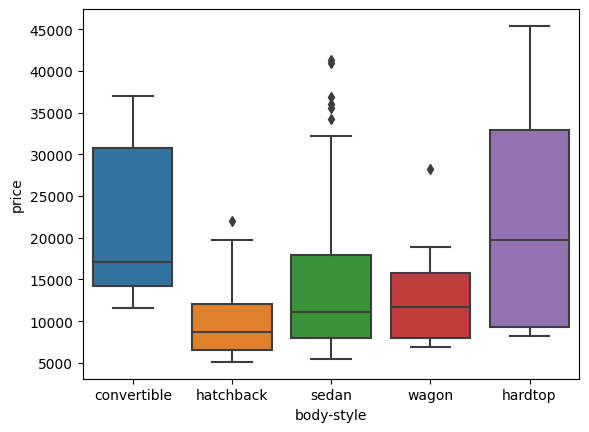

In [37]:
sns.boxplot (x = 'body-style', y = 'price', data = df)

<Axes: xlabel='engine-location', ylabel='price'>

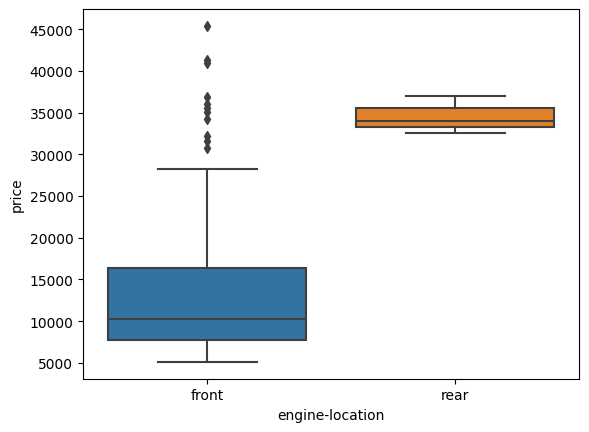

In [38]:
sns.boxplot (x = 'engine-location', y = 'price', data = df)

<Axes: xlabel='drive-wheels', ylabel='price'>

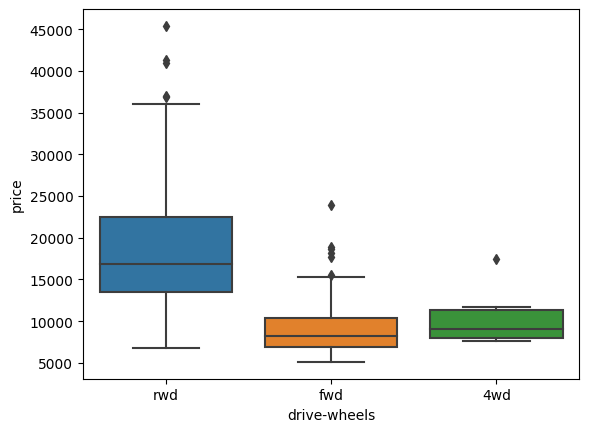

In [39]:
sns.boxplot (x = 'drive-wheels', y = 'price', data = df)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U3'), dtype('float64')) -> None

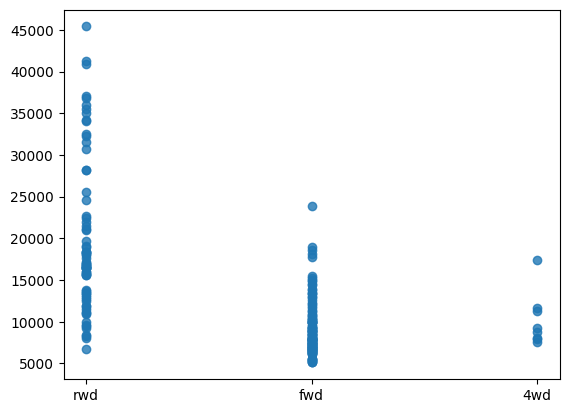

In [40]:
sns.regplot (x = 'drive-wheels', y = 'price', data = df)
plt.ylim(0,)

#### Grouping Data

In [ ]:
#how many unique values for a categorical data column
df['drive-wheels'].unique()

In [ ]:
df['body-style'].unique()

In [ ]:
#let us create a group
df_group_one = df[['drive-wheels', 'price']]

In [ ]:
df_group_one

In [ ]:
# find the mean for each group
#getting the mean of each subcategory
df_group_one = df_group_one.groupby(['drive-wheels'], as_index = False).mean()

In [ ]:
df_group_one

#### Correlation and Causation

In [ ]:
# P-value: is the probability that the correlation between two variables is statistically significant
# p < 0.001: strong evidence that the correlation is significant
# p < 0.05: moderate evidence that the correlation is significant
# p < 0.1: weak evidence that the correlation is significant
# p > 0.1: no evidence that the correlation is significant

In [42]:
# import the stats library
from scipy import stats

In [43]:
# compute the correlation coefficient and then the p-value
# between 'wheel-base' and 'price'
pearson_coeff, p_value = stats.pearsonr (df['wheel-base'], df['price'])
print ('Correlation coefficent =', pearson_coeff, ' p-value =', p_value)

Correlation coefficent = 0.584641822265508  p-value = 8.076488270732885e-20


In [ ]:
pearson_coeff, p_value = stats.pearsonr (df['engine-size'], df['price'])
print ('Correlation coefficent =', pearson_coeff, ' p-value =', p_value)

#### Pivot Tables

In [ ]:
# Grouping results together
df_gtest = df[['drive-wheels', 'body-style', 'price']]
grouped_test1 = df_gtest.groupby(['drive-wheels', 'body-style'], as_index = False).mean()
grouped_test1


In [ ]:
grouped_pivot = grouped_test1.pivot(index = 'drive-wheels', columns = 'body-style')
grouped_pivot

In [ ]:
# fill missing values with 0
#grouped_pivot.fillna(0)

# OR
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

#### Heat Map

In [ ]:
# use the grouped results
plt.pcolor (grouped_pivot, cmap = 'RdBu')
plt.colorbar()
plt.show()

#### Analysis of Variance (ANOVA)
ANOVA returns two parameters
* F test score: 
* P-value:

In [ ]:
grouped_test2 = df_gtest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head()

In [ ]:
df_gtest

In [ ]:
grouped_test2.get_group('4wd')['price']

In [ ]:
# ANOVA
f_val, p_val = stats.f_oneway (grouped_test2.get_group('fwd')['price'], 
                               grouped_test2.get_group('rwd')['price'], 
                               grouped_test2.get_group('4wd')['price']
                              )
print('ANOVA results: F =',f_val, 'P = ', p_val)

#### 4wf and rwd

In [ ]:
# ANOVA
f_val, p_val = stats.f_oneway (grouped_test2.get_group('4wd')['price'], 
                               grouped_test2.get_group('rwd')['price']
                              )
print('ANOVA results: F =',f_val, 'P = ', p_val)

#### 4wd and fwd

In [ ]:
# ANOVA
f_val, p_val = stats.f_oneway (grouped_test2.get_group('4wd')['price'], 
                               grouped_test2.get_group('fwd')['price']
                              )
print('ANOVA results: F =',f_val, 'P = ', p_val)

#### Linear Regression

In [ ]:
# import the linear regression model
from sklearn.linear_model import LinearRegression

In [ ]:
# Create a linear regression object
lm = LinearRegression()

In [ ]:
# can highway-mpg predict car price
X = df[['highway-mpg']]
Y = df['price']

In [ ]:
# fit the model
lm.fit (X,Y)

In [ ]:
# output the prediction
Yhat = lm.predict (X)
Yhat[0:5]

In [ ]:
X[0:5]

In [ ]:
# what is the intercept
lm.intercept_

In [ ]:
# what is the slope
lm.coef_

#### R^2 Coefficient of Determination

In [ ]:
print ('R-squared = ', lm.score(X,Y))

#### Mean Squared Error

In [ ]:
# import mean square error module
from sklearn.metrics import mean_squared_error

In [ ]:
# obtain the mean squared error
mse = mean_squared_error (df['price'], Yhat)
print ('MSE = ', mse)

#### Multiple Linear Regression

In [ ]:
# define predictor with multiple parameters
Z = df[['engine-size', 'highway-mpg']]

In [ ]:
# create linear regression model
lm.fit (Z, df['price'])

In [ ]:
# value and intercept
lm.intercept_

In [ ]:
# value of the slope
lm.coef_

(predicted) price = 2903.8 + (139.84 * engine-size) + (-242.41 * highway-mpg)

In [ ]:
# define predictor with multiple parameters
Z = df[['curb-weight', 'engine-size', 'horsepower']]

In [ ]:
# create linear regression model
lm.fit (Z, df['price'])

In [ ]:
lm.intercept_

In [ ]:
lm.coef_

(predicted) price = -13778.400282075316 + (4.40171374 * curb-weight) + (83.86510939 * engine-size) + (49.27955442 * horsepower)